In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('train2.csv')

In [19]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [ ]:
df['choose'][(df['mean_exam_points']<50)&(df['choose']==0)]=1
df['choose'][(df['mean_exam_points']<50)&(df['choose']==1)]=0

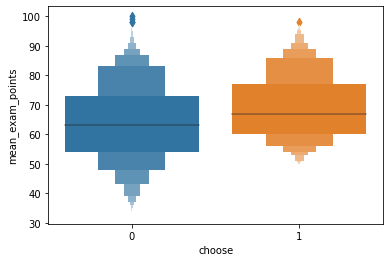

In [22]:
sns.boxenplot(df['choose'],df['mean_exam_points']);

In [23]:
dups_shape = df.pivot_table(index=['mean_exam_points'], aggfunc='size')
dups_shape

mean_exam_points
33.0      6
34.0     23
35.0     23
36.0     42
37.0     62
         ..
96.0     14
97.0     10
98.0      3
99.0      1
100.0     1
Length: 68, dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


### Средний возраст участников - 45 лет; минимальный возраст 23, максимальный - 68(?) лет;

<AxesSubplot:xlabel='age'>

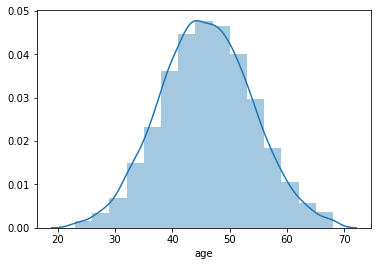

In [25]:
sns.distplot(df['age'],bins=15)

### Выглядит близко к нормальному распределению. Оставим "как есть"

### Генерация новых признаков

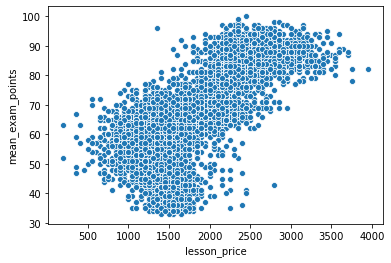

In [26]:
sns.scatterplot(df['lesson_price'],df['mean_exam_points']);

#### Видно,что в целом успеваемость учеников в какой-то степени коррелирует (положительно) со стоимостью занятий; поэтому сделаем группировку учеников по стоимости уроков, которые они оплачивают (всего будет 4 группы, согласно квартилям).

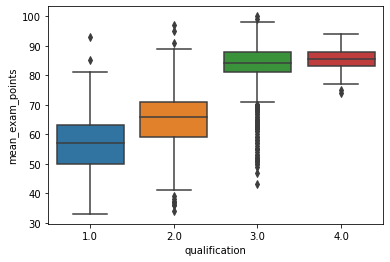

In [27]:
sns.boxplot(df['qualification'],df['mean_exam_points'],orient='v');

#### Тут показано, что имеется какая-то разница между квалификациями 1,2 и 3,4: у первой пары квалификаций успеваемость ниже, у второй - выше; этот наблюдение добавим ниже (первая пара будет под номером 1, вторая - 2)

In [28]:
df['age_group']=pd.cut(df['age'],[0,40,46,51,100],labels=[1,2,3,4]).astype('float')
df['price_group']=pd.cut(df['lesson_price'],[0,1300,1550,2150,10000],labels=[1,2,3,4]).astype('float')
df.loc[df['years_of_experience']>0,'year_age_group']=df.loc[df['years_of_experience']>0,'age']/df.loc[df['years_of_experience']>0,'years_of_experience']
df.loc[df['years_of_experience']==0,'year_age_group']=df.loc[df['years_of_experience']==0,'age']
quartiles = [df['year_age_group'].quantile(0),
            df['year_age_group'].quantile(0.25),
            df['year_age_group'].quantile(0.5),
            df['year_age_group'].quantile(0.75),
            df['year_age_group'].quantile(1)]
df['year_age_group'] = pd.cut(df['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')
quartiles_score = [df['mean_exam_points'].quantile(0),
#             df['mean_exam_points'].quantile(0.25),
#             df['mean_exam_points'].quantile(0.5),
            df['mean_exam_points'].quantile(0.75),
            df['mean_exam_points'].quantile(1)]
df['mean_exam_points_group']=pd.cut(df['mean_exam_points'],quartiles_score,labels=[1,2]).astype('float')
df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,age_group,price_group,year_age_group,mean_exam_points_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,1.0,3.0,3.0,1.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,4.0,1.0,3.0,1.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,1.0,3.0,1.0,1.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0,1.0,1.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,2.0,4.0,2.0,1.0
5,5,37.0,3.0,1050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0,1.0,1.0,1.0,1.0
6,6,54.0,3.0,800.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,1,4.0,1.0,2.0,1.0
7,7,32.0,2.0,2750.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,95.0,0,1.0,4.0,2.0,2.0
8,8,56.0,3.0,1300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0,4.0,1.0,2.0,1.0
9,9,44.0,4.0,2350.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0,2.0,4.0,1.0,1.0


#### При группировке по тьютору видна разница между группами по ранее сформированным группам по цене обучения

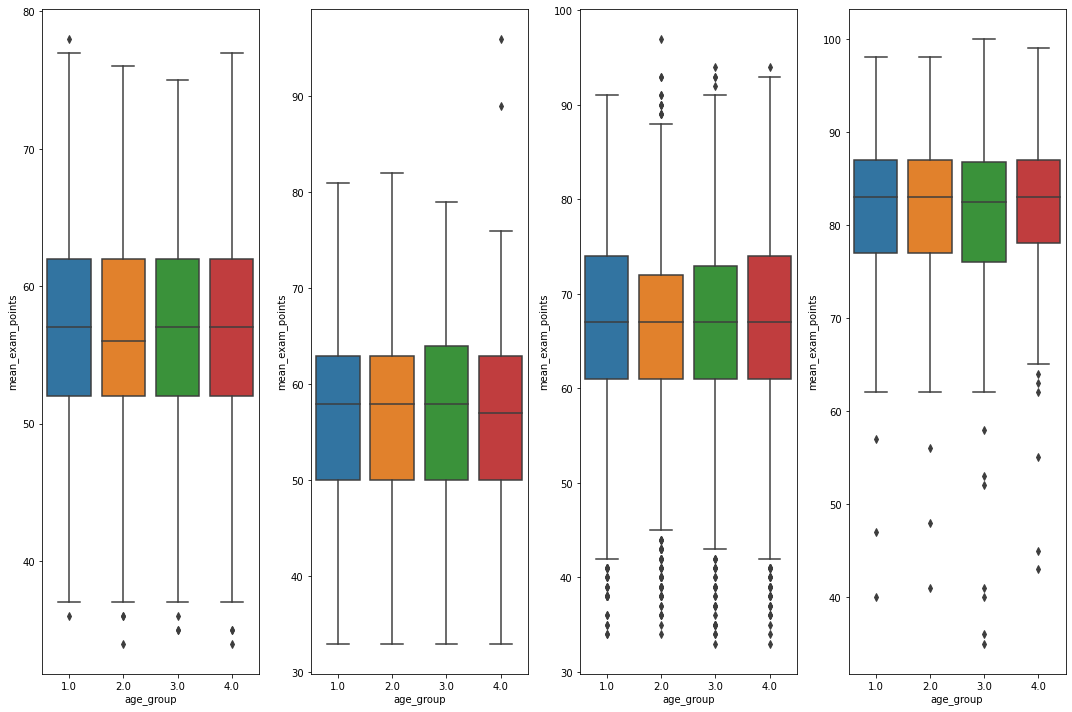

In [51]:
fig,axis = plt.subplots(1,4,figsize=(15,10))
for i in df['price_group'].unique():
    sns.boxplot(df[df['price_group']==i]['age_group'],df[df['price_group']==i]['mean_exam_points'],orient='v',ax=axis[int(i)-1])
    plt.tight_layout()

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.800900,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.974800,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.440000,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.724300,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.370600,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.121500,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.117200,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.059100,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.027700,0.164120,0.0,0.00,0.0,0.00,1.0


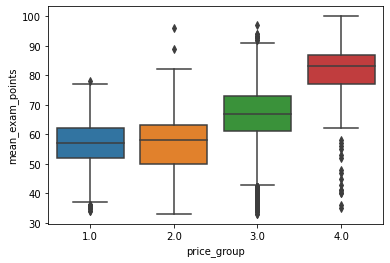

In [52]:
sns.boxplot(df['price_group'],df['mean_exam_points'],orient='v');

In [32]:
df['qualification_height']=pd.cut(df['qualification'],[-1,3,5],labels=[0,1]).astype('float')

df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,age_group,price_group,year_age_group,mean_exam_points_group,qualification_height
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,1.0,3.0,3.0,1.0,0.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,4.0,1.0,3.0,1.0,0.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,1.0,3.0,1.0,1.0,0.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0,1.0,1.0,0.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,2.0,4.0,2.0,1.0,0.0


In [33]:
data, labels = df.iloc[:,1:].drop('choose',axis=1).values,df.iloc[:,12].values

In [34]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [35]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data # значения признаков
        self.labels = labels  # y_true
        self.prediction = self.predict()  # y_pred
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его   
        prediction = max(classes, key=classes.get)
        return prediction

In [36]:
def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [37]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выборки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0]) # для правого (1-p)
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels) # Функционал качества

In [38]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [39]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels) 

    best_quality = 0
    best_t = None # лучший порог разбиения
    best_index = None # лучший индекс разбиения
    
    n_features = data.shape[1] # кол-во признаков
    
    for index in range(n_features): # проход по всем признакам
        t_values = [row[index] for row in data] # берем столбец/признак с соотв. индексом
        
        for t in t_values: # проход по признаку
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t) # делаем разбиение
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue # начинаем следующий проход цикла, минуя оставшееся тело цикла
            
            # расчет качества текущего разбиения
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [40]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels) # ищем лучшее разбиение
    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    # неопределенность после разбиения осталась такой же как до
    if quality == 0: # критерий останова
#         print('leaf')
        return Leaf(data, labels) # считаем прогноз для листьев

    # если качество улучшилось, то делим дерево по лучшему разбиению
    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [41]:
# Проход объекта по дереву для его классификации

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf): # проверка текущий узел это лист?
        answer = node.prediction # считаем прогноз для листа
        return answer

    if obj[node.index] <= node.t: # если значение признака меньше порога t
        return classify_object(obj, node.true_branch) # рекурсия: отправляем объект в true-ветку
    else:
        return classify_object(obj, node.false_branch) # рекурсия: отправляем объект в false-ветку

In [42]:
# Предсказание деревом для всего датасета

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree) # определяем ветки для объектов
        classes.append(prediction)
    return classes

In [43]:
# Построим дерево по обучающей выборке
my_tree = build_tree(data, labels)

In [44]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [45]:
# Точность на обучающей выборке
answers = predict(data, my_tree)
train_accuracy = accuracy_metric(labels, answers)
train_accuracy

95.49

In [46]:
test_df = pd.read_csv('test2.csv',index_col=0)
test_df['age_group']=pd.cut(test_df['age'],[0,40,46,61,100],labels=[1,2,3,4]).astype('float')
test_df['price_group']=pd.cut(test_df['lesson_price'],[0,1300,1500,2150,10000],labels=[1,2,3,4]).astype('float')
test_df['qualification_height']=pd.cut(test_df['qualification'],[0,3,5],labels=[0,1]).astype('float')
test_df['year_age_group']=''
test_df.loc[test_df['years_of_experience']>0,'year_age_group']=test_df.loc[test_df['years_of_experience']>0,'age']/test_df.loc[test_df['years_of_experience']>0,'years_of_experience']
test_df.loc[test_df['years_of_experience']==0,'year_age_group']=test_df.loc[test_df['years_of_experience']==0,'age']
test_df['year_age_group'] = pd.cut(test_df['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')
test_df['mean_exam_points_group']=pd.cut(test_df['mean_exam_points'],quartiles_score,labels=[1,2]).astype('float')
a = test_df['qualification'].copy()
b = test_df['price_group'].copy()

for i in test_df['qualification'].unique():
    for k in test_df.columns:
        test_df.loc[test_df['qualification']==i,k] = (test_df.loc[test_df['qualification']==i,k].mean() - test_df.loc[test_df['qualification']==i,k]) / test_df.loc[test_df['qualification']==i,k].mean()
        
test_df['qualification'] = a
test_df['price_group'] = b
# Просмотр результата
test_df.head()


answers = predict(test_df.values, my_tree)


In [47]:
test_df['choose'] = answers
test_df['choose'].to_csv('andrey_lipin_solution2.csv')

In [48]:
test_df['choose'].value_counts()

0    6405
1    3595
Name: choose, dtype: int64